In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehranehmgh","key":"8b10f8963aaf16fe2e6d644d4dbfd5dd"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 28.1MB/s]


In [5]:
!unzip '/content/mobile-price-classification.zip' -d '/content/'

Archive:  /content/mobile-price-classification.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


In [6]:
import pandas as pd

df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [7]:
#df_test = pd.read_csv('/content/test.csv')
#df_test

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## **Some Visualization**

In [10]:
import plotly.express as px
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt

In [11]:
count = df_train.price_range.value_counts()
category = count.index

In [12]:
category

Int64Index([3, 2, 1, 0], dtype='int64')

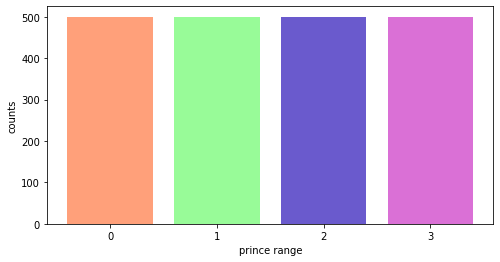

In [13]:
plt.figure(figsize=(8,4))
plt.bar(category,count, color=['orchid', 'slateblue', 'palegreen', 'lightsalmon']) 
plt.xlabel('prince range')
plt.ylabel('counts')
plt.xticks([0, 1, 2, 3])
plt.show()

In [14]:
wifi_val = df_train.wifi.value_counts()
wifi_val

1    1014
0     986
Name: wifi, dtype: int64

<Figure size 720x432 with 0 Axes>

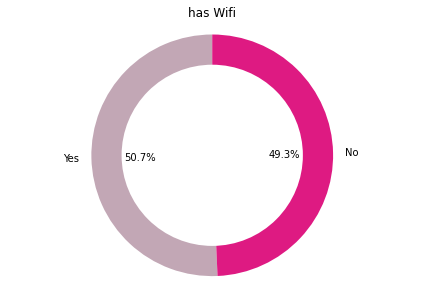

In [15]:
plt.figure(figsize=(10,6))
colors=['#C2A7B5','#DE1A82']
fig1, ax1 = plt.subplots()
ax1.pie(x = wifi_val, colors = colors, labels=['Yes','No'], autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("has Wifi")
plt.show()

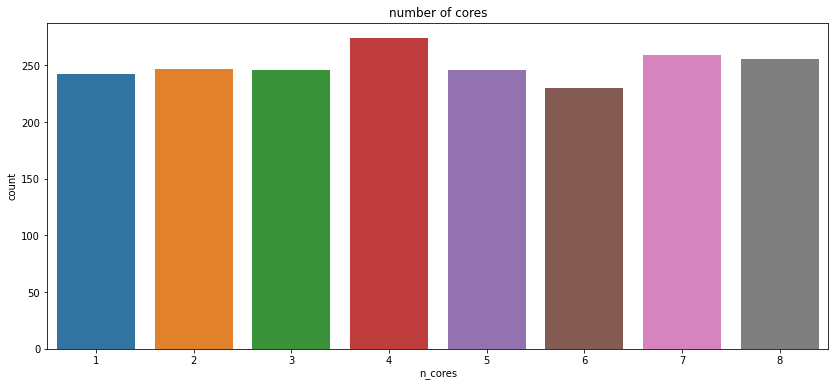

In [16]:
plt.figure(figsize=(14,6))
sb.countplot(x = "n_cores",data=df_train)
plt.title("number of cores")
plt.show()

In [17]:
blue_val = df_train.blue.value_counts()
blue_val

0    1010
1     990
Name: blue, dtype: int64

<Figure size 720x432 with 0 Axes>

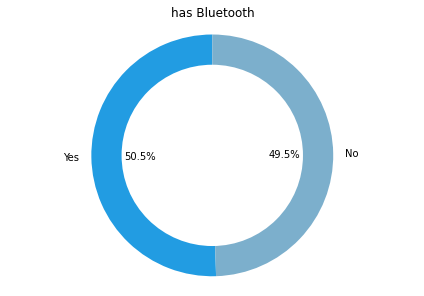

In [18]:
plt.figure(figsize=(10,6))
colors=['#229CE2','#7CAFCC']
fig1, ax1 = plt.subplots()
ax1.pie(x= blue_val, colors = colors, labels=['Yes','No'], autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("has Bluetooth")
plt.show()

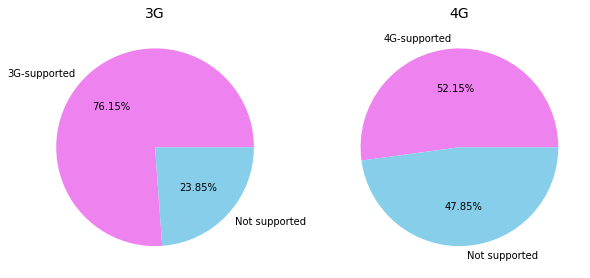

In [19]:
val_3g = df_train["three_g"].value_counts()
val_4g = df_train["four_g"].value_counts()

colors = ["violet", "skyblue"]

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(x= val_3g, autopct="%.2f%%",
        labels=["3G-supported",'Not supported'], pctdistance=0.6,
        colors = colors)
plt.title('3G', size = 14)

ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(x =val_4g,autopct="%.2f%%", 
        labels=["4G-supported",'Not supported'], pctdistance=0.6, 
        colors = colors)
plt.title('4G', size = 14)
plt.show()

In [20]:
range_mapping = {0: "cheap",
    1: "standart",
    2: "expensive",
    3: "very expensive"}

In [21]:
df_train['price_range_mapped'] = df_train['price_range'].map(range_mapping)

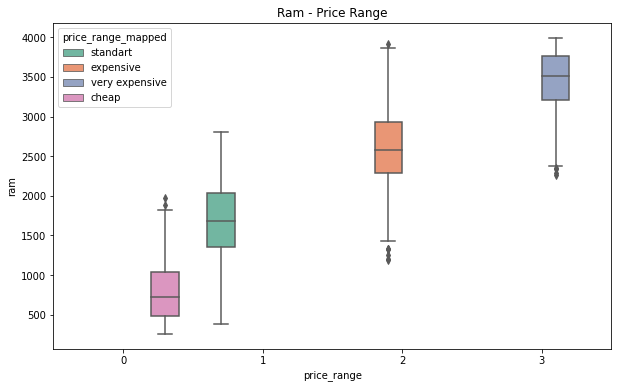

In [22]:
plt.figure(figsize=(10,6))
sb.boxplot(x='price_range', y='ram', data=df_train, palette="Set2", hue='price_range_mapped')
plt.title("Ram - Price Range")
plt.show()

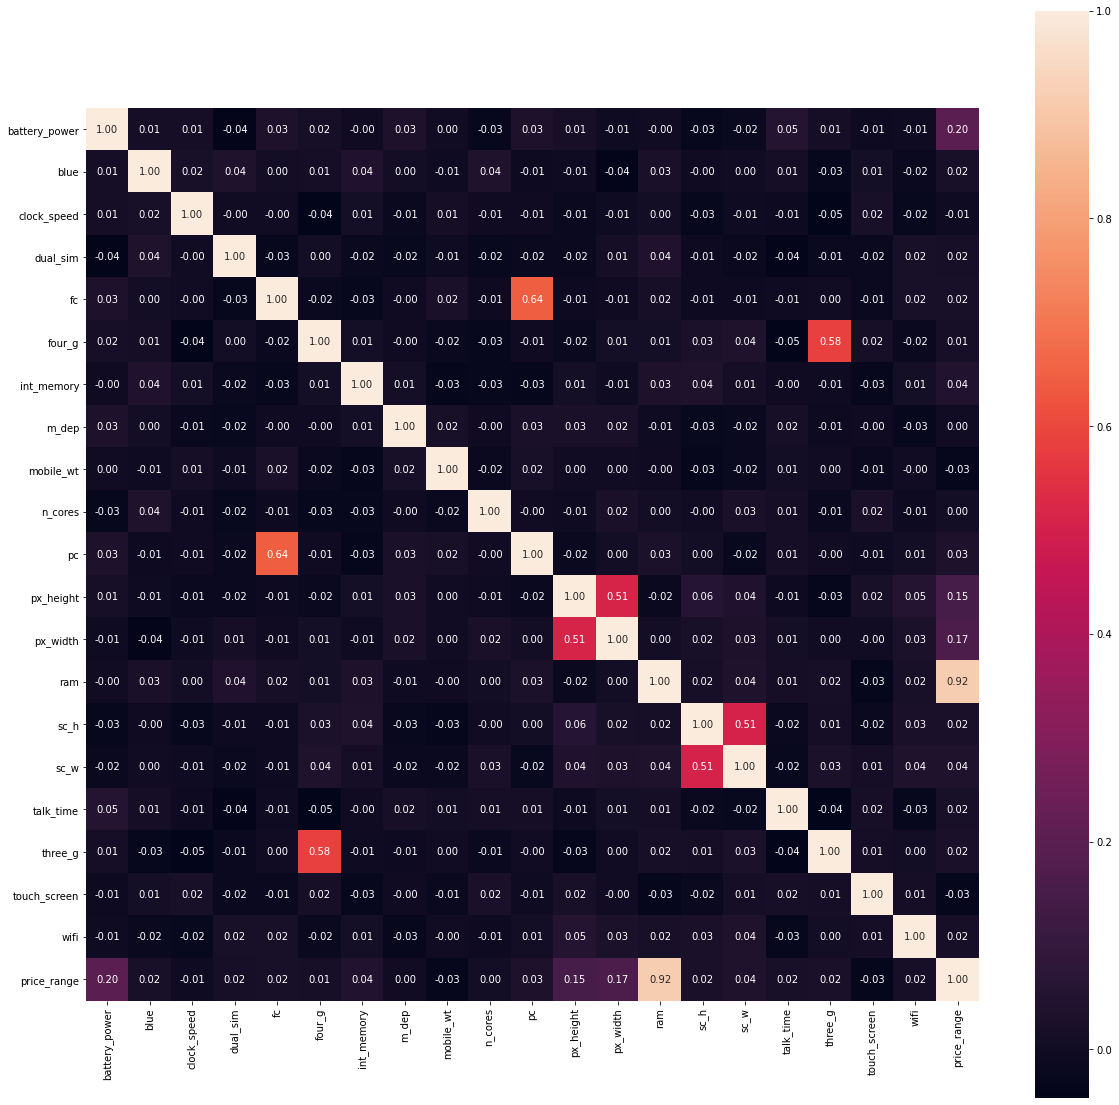

In [23]:
corr=df_train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sb.heatmap(corr, square = True,fmt='.2f' ,annot = True)

## **Data Preprocessing**

In [24]:
from sklearn.model_selection import train_test_split

features = df_train.drop(columns=['price_range' ,'price_range_mapped'])
target = df_train['price_range']

x=features.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [27]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

confussion matrix
[[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]
-------------------------------------------
Accuracy of Logistic Regression: 97.5 

-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



## **with Two Class**

In [28]:
di = {1:1 , 2:1, 3:1}
df_train = df_train.replace({"price_range": di})

In [29]:
counts = df_train.price_range.value_counts()
labels = counts.index
counts

1    1500
0     500
Name: price_range, dtype: int64

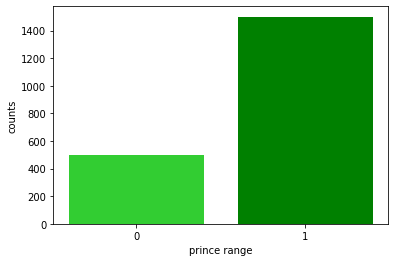

In [30]:
plt.figure(figsize=(6,4))
plt.bar(labels,counts, color=['g', 'limegreen']) 
plt.xlabel('prince range')
plt.ylabel('counts')
plt.xticks([0, 1])
plt.show()

In [31]:
features = df_train.drop(columns=['price_range' ,'price_range_mapped'])
target = df_train['price_range']

x=features.values
y=target.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [33]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

confussion matrix
[[101   4]
 [  0 295]]
-------------------------------------------
Accuracy of Logistic Regression: 99.0 

-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.99      1.00      0.99       295

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



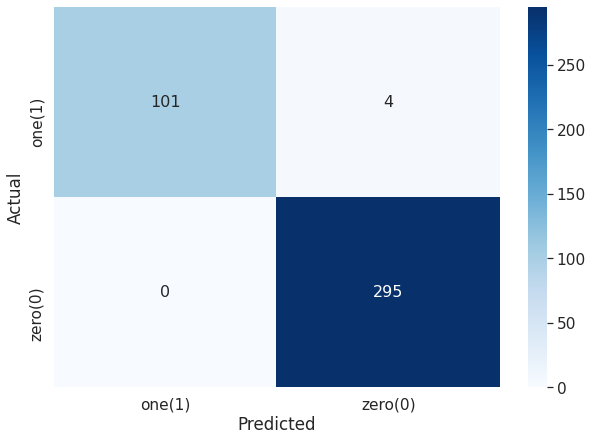

In [34]:
import numpy as np
y_true = ['zero(0)','one(1)']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sb.set(font_scale=1.4)#for label size
sb.heatmap(df_cm, cmap="Blues",fmt="d", annot=True,annot_kws={"size": 16})# font size
plt.show()

## **Make data Balance**

In [35]:
counts

1    1500
0     500
Name: price_range, dtype: int64

In [36]:
count_class_1, count_class_0 = df_train.price_range.value_counts()

In [37]:
df_class_0 = df_train[df_train['price_range'] == 0]
df_class_1 = df_train[df_train['price_range'] == 1]

In [38]:
count_class_1

1500

Random over-sampling:
1    1500
0    1500
Name: price_range, dtype: int64


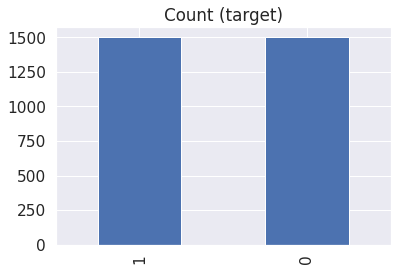

In [39]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.price_range.value_counts())

df_test_over.price_range.value_counts().plot(kind='bar', title='Count (target)');

In [40]:
df_test_over

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_range_mapped
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,standart
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,1,expensive
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,1,expensive
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1,expensive
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,standart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,965,1,1.5,1,5,0,13,1.0,109,2,14,130,998,1138,9,8,10,0,1,0,0,cheap
1200,530,0,2.4,0,1,0,32,0.3,88,6,20,48,1012,959,17,7,6,0,1,0,0,cheap
1383,1763,0,0.5,1,12,0,10,0.2,184,3,19,238,1893,792,17,12,13,1,0,1,0,cheap
31,1568,1,0.5,0,16,0,33,1.0,150,8,20,413,654,508,5,1,6,1,1,1,0,cheap


In [41]:
b_features = df_test_over.drop(columns=['price_range' ,'price_range_mapped'])
b_target = df_test_over['price_range']

x = b_features.values
y = b_target.values

b_x_train, b_x_test, b_y_train, b_y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [42]:
sc = StandardScaler()

b_x_train = sc.fit_transform(b_x_train)
b_x_test = sc.transform(b_x_test)

In [43]:
lr = LogisticRegression()
lr.fit(b_x_train,b_y_train)
b_y_pred = lr.predict(b_x_test)

lr_conf_matrix = confusion_matrix(b_y_test, b_y_pred)
lr_acc_score = accuracy_score(b_y_test, b_y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(b_y_test,b_y_pred))

confussion matrix
[[287   0]
 [  8 305]]
-------------------------------------------
Accuracy of Logistic Regression: 98.66666666666667 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       287
           1       1.00      0.97      0.99       313

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



## **Forward Selection**

In [44]:
df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [45]:
#CHANGE 4CLASSES TO 2CLASS - 0,1:L(LOW) 2,3:H(HIGH)

dictionary = {0:'L' ,1:'L', 2:'H', 3:'H'}
df_train = df_train.replace({"price_range": dictionary})

In [46]:
y.shape

(3000,)

In [47]:
df_train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,L
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,H
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,H
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,H
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,L
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,L
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,H
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,L
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,L
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,L


In [48]:
features = df_train.drop(columns=['price_range'])
target = df_train['price_range']

x=features.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [49]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector1 = SequentialFeatureSelector(LogisticRegression(n_jobs=-1),
           k_features=11,
           forward=True,
           verbose=4,
           scoring='roc_auc',
           cv=4)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [51]:
feature_selector1

SequentialFeatureSelector(clone_estimator=True, cv=4,
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='auto',
                                                       n_jobs=-1, penalty='l2',
                                                       random_state=None,
                                                       solver='lbfgs',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False),
                          floating=False, forward=True, 

In [52]:
features1 = feature_selector1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.0s finished

[2021-04-14 12:44:52] Features: 1/11 -- score: 0.9730493262331559[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.0s finished

[2021-04-14 12:44:53] Features: 2/11 -- score: 0.9867434185854647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Para

In [53]:
filtered_features1=features.columns[list(features1.k_feature_idx_)]
filtered_features1

Index(['battery_power', 'blue', 'four_g', 'int_memory', 'mobile_wt',
       'px_height', 'px_width', 'ram', 'sc_h', 'talk_time', 'wifi'],
      dtype='object')

## **LR for Selected Features(forward)**

In [54]:
new_features = df_train[['battery_power', 'blue', 'four_g', 'int_memory', 'mobile_wt',
       'px_height', 'px_width', 'ram', 'sc_h', 'talk_time', 'wifi']].values
new_target = df_train['price_range'].values

new_x = new_features
new_y = new_target

n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(new_x, new_y, test_size = 0.2, random_state =42)

In [55]:
sc = StandardScaler()

n_x_train = sc.fit_transform(n_x_train)
n_x_test = sc.transform(n_x_test)

In [56]:
new_classifier = LogisticRegression()
new_classifier.fit(n_x_train,n_y_train)
n_y_pred = new_classifier.predict(n_x_test)

lr_conf_matrix = confusion_matrix(n_y_test, n_y_pred)
lr_acc_score = accuracy_score(n_y_test, n_y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(n_y_test,n_y_pred))

confussion matrix
[[202   2]
 [  0 196]]
-------------------------------------------
Accuracy of Logistic Regression: 99.5 

-------------------------------------------
              precision    recall  f1-score   support

           H       1.00      0.99      1.00       204
           L       0.99      1.00      0.99       196

    accuracy                           0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400



## **Working with PCA**

In [57]:
df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [58]:
features = df_train.drop(columns=['price_range'])
target = df_train['price_range']

x=features.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 11)
x_pca = pca.fit_transform(x)
principalDf = pd.DataFrame(data = x_pca
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4','principal component 5',
                          'principal component 6','principal component 7', 'principal component 8','principal component 9',
                          'principal component 10','principal component 11'])
#x_pca.shape
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11
0,430.597094,-795.788231,-390.070331,55.636140,-48.449289,-23.958994,-8.947228,-8.166462,1.082860,-3.209896,-0.132228
1,504.984735,696.622368,-235.629081,343.925977,4.707406,21.019436,-5.267528,3.864612,-0.410696,5.640195,-0.886906
2,473.329828,763.942136,-680.059466,-113.916880,-4.650897,8.552010,-3.931877,0.344322,-4.743176,1.401782,-0.680265
3,639.822324,779.691180,-630.783647,-30.402246,8.627542,-22.718821,-3.030922,0.355942,3.529089,2.444221,2.346719
4,-718.985184,382.304525,591.040362,-392.357235,-0.346183,11.785749,8.342129,-4.832881,-4.704664,-2.979623,-4.487295
...,...,...,...,...,...,...,...,...,...,...,...
1995,-1461.096167,843.813138,-456.014439,62.281534,33.612901,-30.142294,1.693325,-8.471003,1.026455,3.848172,4.448768
1996,-94.445767,693.937805,708.385209,354.827455,-46.406446,8.722143,-8.702861,-3.820755,3.251932,-3.232667,1.543891
1997,930.669266,436.671452,664.296211,136.527432,32.374260,2.975007,-7.935442,4.715660,-7.461475,0.576158,-0.839954
1998,-1252.737615,-629.884112,285.786392,-190.422713,-4.217939,14.721215,-4.114681,-5.969166,9.023234,0.008794,-2.582837


In [60]:
finalDf = pd.concat([principalDf, df_train[['price_range']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,price_range
0,430.597094,-795.788231,-390.070331,55.636140,-48.449289,-23.958994,-8.947228,-8.166462,1.082860,-3.209896,-0.132228,1
1,504.984735,696.622368,-235.629081,343.925977,4.707406,21.019436,-5.267528,3.864612,-0.410696,5.640195,-0.886906,2
2,473.329828,763.942136,-680.059466,-113.916880,-4.650897,8.552010,-3.931877,0.344322,-4.743176,1.401782,-0.680265,2
3,639.822324,779.691180,-630.783647,-30.402246,8.627542,-22.718821,-3.030922,0.355942,3.529089,2.444221,2.346719,2
4,-718.985184,382.304525,591.040362,-392.357235,-0.346183,11.785749,8.342129,-4.832881,-4.704664,-2.979623,-4.487295,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1461.096167,843.813138,-456.014439,62.281534,33.612901,-30.142294,1.693325,-8.471003,1.026455,3.848172,4.448768,0
1996,-94.445767,693.937805,708.385209,354.827455,-46.406446,8.722143,-8.702861,-3.820755,3.251932,-3.232667,1.543891,2
1997,930.669266,436.671452,664.296211,136.527432,32.374260,2.975007,-7.935442,4.715660,-7.461475,0.576158,-0.839954,3
1998,-1252.737615,-629.884112,285.786392,-190.422713,-4.217939,14.721215,-4.114681,-5.969166,9.023234,0.008794,-2.582837,0


In [61]:
x_pca_train , x_pca_test = train_test_split(x_pca , test_size = 0.2, random_state = 42)

In [62]:
x_pca_train = sc.fit_transform(x_pca_train)
x_pca_test = sc.transform(x_pca_test)

In [63]:
new_lr = LogisticRegression()
new_lr.fit(x_pca_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
pca_pred = new_lr.predict(x_pca_test)

lr_conf_matrix = confusion_matrix(y_test, pca_pred)
lr_acc_score = accuracy_score(y_test, pca_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test, pca_pred))

confussion matrix
[[103   2   0   0]
 [  0  91   0   0]
 [  0   1  89   2]
 [  0   0   1 111]]
-------------------------------------------
Accuracy of Logistic Regression: 98.5 

-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.97      1.00      0.98        91
           2       0.99      0.97      0.98        92
           3       0.98      0.99      0.99       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



## **Backward Selection**

In [65]:
df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [66]:
#CHANGE 4CLASSES TO 2CLASS - 0,1:L(LOW) 2,3:H(HIGH)

dictionary = {0:'L' ,1:'L', 2:'H', 3:'H'}
df_train = df_train.replace({"price_range": dictionary})

In [67]:
features = df_train.drop(columns=['price_range'])
target = df_train['price_range']

x=features.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [68]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [69]:
feature_selector2 = SequentialFeatureSelector(LogisticRegression(n_jobs=-1),
           k_features=11,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [70]:
features2 = feature_selector2.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.3s finished

[2021-04-14 12:45:56] Features: 19/11 -- score: 0.9991687292182304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.3s finished

[2021-04-14 12:45:57] Features: 18/11 -- score: 0.9993062326558164[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.2s finished

[2021-04-14 12:45:58] Features: 17/11 -- score: 0.9993999849996249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [71]:
filtered_features2 = features.columns[list(features2.k_feature_idx_)]
filtered_features2

Index(['battery_power', 'blue', 'four_g', 'int_memory', 'mobile_wt',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'wifi'],
      dtype='object')

## **LR for Selected Features(backward)**

In [72]:
back_features = df_train[['battery_power', 'blue', 'four_g', 'int_memory', 'mobile_wt',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'wifi']].values
back_target = df_train['price_range'].values

backs_x = back_features
backs_y = back_target

backs_x_train, backs_x_test, backs_y_train, backs_y_test = train_test_split(backs_x, backs_y, test_size = 0.2, random_state =42)

In [73]:
sc = StandardScaler()

backs_x_train = sc.fit_transform(backs_x_train)
backs_x_test = sc.transform(backs_x_test)

In [74]:
lr_back = LogisticRegression()
lr_back.fit(backs_x_train,backs_y_train)
lr_y_pred = lr_back.predict(backs_x_test)

lr_conf_matrix = confusion_matrix(backs_y_test, lr_y_pred)
lr_acc_score = accuracy_score(backs_y_test, lr_y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(backs_y_test,lr_y_pred))

confussion matrix
[[203   1]
 [  0 196]]
-------------------------------------------
Accuracy of Logistic Regression: 99.75 

-------------------------------------------
              precision    recall  f1-score   support

           H       1.00      1.00      1.00       204
           L       0.99      1.00      1.00       196

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



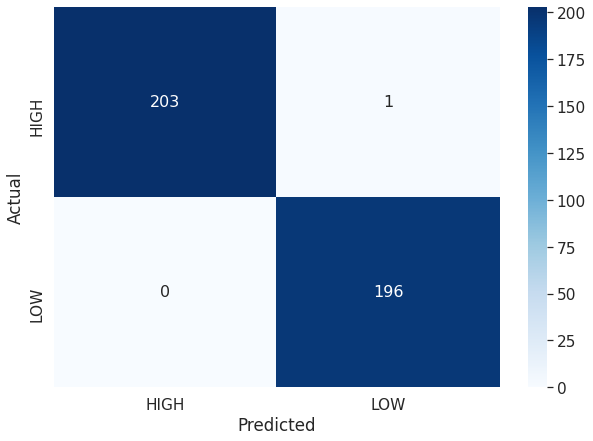

In [75]:
y_true = ['LOW','HIGH']
pred = ['LOW','HIGH']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sb.set(font_scale=1.4)#for label size
sb.heatmap(df_cm, cmap="Blues",fmt="d", annot=True,annot_kws={"size": 16})# font size
plt.show()

## **K-fold Cross Validation**

In [76]:
df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [77]:
features = df_train.drop(columns=['price_range'])
target = df_train['price_range']

x=features.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [79]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
from sklearn.model_selection import cross_val_score

#cross_validation
#accuracy

five_cv_scores = cross_val_score(classifier , X_train, y_train,cv = 5)
ten_cv_scores = cross_val_score(classifier , X_train ,y_train, cv = 10)
print('mean accuracy in 5-fold is {0:.2f}% and in 10-fold is {1:.2f}%'.format(np.mean(five_cv_scores) * 100, np.mean(ten_cv_scores) * 100) )
print('\n -----------------')
print('accuracy in five folds:' , five_cv_scores * 100 , '\n -----------------')
print('accuracy in ten folds:', ten_cv_scores * 100)

mean accuracy in 5-fold is 95.00% and in 10-fold is 95.38%

 -----------------
accuracy in five folds: [95.     95.     94.6875 93.4375 96.875 ] 
 -----------------
accuracy in ten folds: [90.625 98.75  96.875 94.375 95.    96.875 94.375 92.5   96.875 97.5  ]
